my_softmax(z):       [0.0320586  0.08714432 0.23688282 0.64391426]
The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000

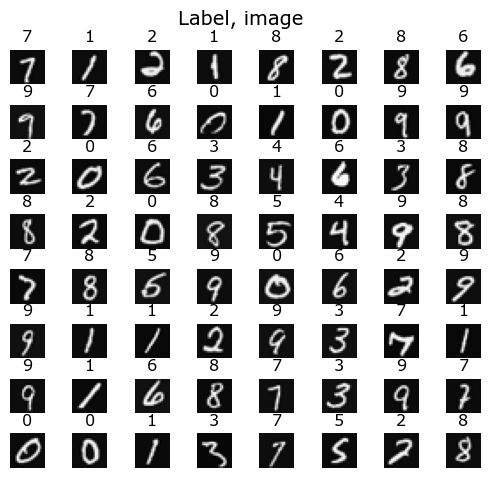

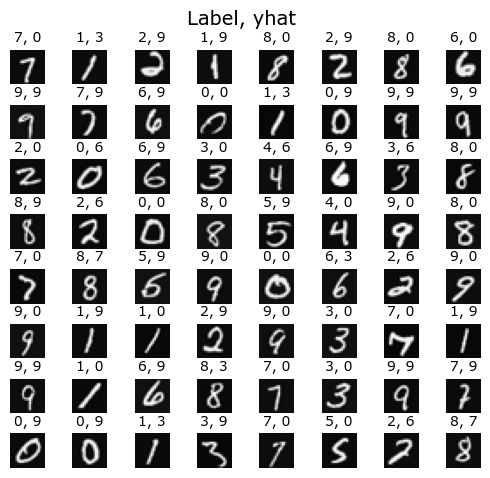

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def relu(z):
    return np.maximum(0,z)

def linear(z):
    return z

def my_softmax(z):
    """
    Softmax converts a vector of values to a probability distribution
    Args:
        z (ndarray (N,)): input data, N features
    Returns:
        a (ndarray (N, )): softmax of z
    """
    ez = np.exp(z)
    a = ez/np.sum(ez)

    return a

z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
print(f'my_softmax(z):       {a}')

# last assignment we did a implementation for binary classification, this week
# we will extend that to multiclass classification. It will utilize softmax activation

# in this assignment we'll use a neural network to recognize ten handwritten digits, 0-9.

from autils import load_data, widgvis
X, y = load_data()

print('The first element of X is: ', X[0])
print('The first element of y is: ', y[0,0])
print('The last element of y is: ', y[-1,0])
print('The shape pf X is: ' + str(X.shape))
print('The shape pf y is: ' + str(y.shape))

import warnings 
warnings.simplefilter(action= 'ignore', category = FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0,0.03,1,0.91]) # left, bottom, rigth, top

# fig.tigth_layout(pad=0.5)
widgvis(fig)
for i, ax in enumerate(axes.flat):
    # select random indices
    random_index = np.random.randint(m)

    # select rows corresponding to the random indices and reshape the image 
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # display the image
    ax.imshow(X_random_reshaped, cmap ='gray')

    # display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle('Label, image', fontsize=14)

def my_dense(a_in, W, b ,g):
    """
    Computes dense layer
    Args:
        a_in (ndarray (m, n_in)): m examples, n_in features
        W (ndarray(n_in, n_out)): weigth matrix, n_in features per unit, n_out units
        b (ndarray (n_out,)): bias vector, n_out units
        g activation function(sigmoid, relu)
    Returns: 
        a_out (ndarray (m, n_out)): m examples, n_out units
    """
    z = np.dot(a_in, W ) + b
    a_out = g(z)
    return a_out

def my_sequential(X, W1, b1, W2, b2, W3, b3):
    """
    Rede neural de 3 camadas
    Camada 1: 400 -> 25 com ReLU
    Camada 2: 25 -> 15 com ReLU
    Camada 3: 15 -> 10 linear (sem ativação)
    """

    A1 = my_dense(X,W1,b1,relu)
    A2 = my_dense(A1,W2,b2,relu)
    A3 = my_dense(A2,W3,b3,linear)
    return A3

# inicializa os pesos MANUALMENTE (subistitui model.layers.get_weigths())
np.random.seed(1234) # para resultados consistentes

W1 = np.random.randn(400,25) * 0.01
b1 = np.zeros(25)

W2 = np.random.randn(25,15) * 0.01
b2 = np.zeros(15)

W3 = np.random.randn(15,10) * 0.01
b3 = np.zeros(10)

# verifica as dimensões (igual ao tensorflow)
print(f'W1 shape = {W1.shape}, b1 shape = {b1.shape}')
print(f'W2 shape = {W2.shape}, b2 shape = {b2.shape}')
print(f'W3 shape = {W3.shape}, b3 shape = {b3.shape}')

# função de perda Sparse categorical cross entropy(implementação numpy)
def sparse_categorical_crossentropy(y_true, y_pred_logits):
    """
    Implementação da perda Sparse categorical cross entropy
    Args: 
        y_true: labels verdadeiros (indices) shape(m,1)
        y_pred_logits: logits da rede shape(m,10)
    Returns:
        loss: valor da perda
    """

    m = y_true.shape[0]

    # aplica softmax nos logits para obter probabilidades
    y_pred = my_softmax(y_pred_logits)

    # pega as probabilidades das classes verdadeiras
    # y_true é flatten para shape(m,)
    y_true_flat = y_true.flatten()

    log_likelihood = -np.log(y_pred[np.arange(m), y_true_flat] + 1e-8)

    # média sobre todos os exemplos
    loss = np.mean(log_likelihood)
    return loss

# testa uma predição
image_of_two = X[1015]

# faz a predição
logits = my_sequential(image_of_two.reshape(1,400), W1,b1,W2,b2,W3,b3)
print(f'Predicting a two (logitis):\n{logits}')
print(f'Largest logit index: {np.argmax(logits)}')

# aplica softmax para obter probabilidades 
probabilities = my_softmax(logits)
print(f'\nPredicting a two(probabilities):\n{probabilities}')
print(f'total of predictions: {np.sum(probabilities):0.3f}')

# predição final
yhat = np.argmax(probabilities)
print(f'\nPredicted digit: {yhat}')

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0,0.03,1,0.91]) # left, bottom, rigth, top


for i, ax in enumerate(axes.flat):
    # select random indices
    random_index = np.random.randint(m)

    # select rows corresponding to the random indices and reshape the image 
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # display the image
    ax.imshow(X_random_reshaped, cmap ='gray')

    logits = my_sequential(X[random_index].reshape(1,400), W1,b1,W2,b2,W3,b3)
    probabilities = my_softmax(logits)
    yhat = np.argmax(probabilities)

    # exibe o rotulo verdadeiro e a predição
    ax.set_title(f'{y[random_index, 0]}, {yhat}', fontsize =10)
    ax.set_axis_off()

fig.suptitle('Label, yhat', fontsize =14)

def calculate_acuracy(X,y, W1,b1,W2,b2,W3,b3):
    'Calcula a o nivel de acerto da rede neural'

    m = X.shape[0]

    # faz predições para todos os exemplos
    logits = my_sequential(X, W1,b1,W2,b2,W3,b3)
    probabilities = my_softmax(logits)
    predictions = np.argmax(probabilities, axis=1)

    y_flat = y.flatten().astype(predictions.dtype)

    correct = np.sum(predictions == y_flat)
    accuracy = correct / m*100

    return accuracy, predictions

accuracy, _ = calculate_acuracy(X, y,W1,b1,W2,b2,W3,b3)
print(f'\nAccuracy with random weigths: {accuracy:.2f}% (expected ~10% for random)')